In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv(r"C:\Users\quant\OneDrive\Desktop\Reviews.csv", nrows=500)
df.head(3)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      500 non-null    int64 
 1   ProductId               500 non-null    object
 2   UserId                  500 non-null    object
 3   ProfileName             500 non-null    object
 4   HelpfulnessNumerator    500 non-null    int64 
 5   HelpfulnessDenominator  500 non-null    int64 
 6   Score                   500 non-null    int64 
 7   Time                    500 non-null    int64 
 8   Summary                 500 non-null    object
 9   Text                    500 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.2+ KB


In [6]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [8]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [10]:
!pip install Textblob

In [30]:
# Import required libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob, Word

# Download NLTK stopwords (Run this once)
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset (Ensure the path is correct)
df = pd.read_csv(r"C:\Users\quant\OneDrive\Desktop\Reviews.csv", nrows=500)

# Ensure 'Text' column exists
if 'Text' in df.columns:
    # Lowercasing and removing punctuations
    df['Text'] = df['Text'].apply(lambda x: " ".join(str(x).lower() for x in str(x).split()))
    df['Text'] = df['Text'].str.replace(r'[^\w\s]', ' ', regex=True)

    # Remove stopwords
    stop = set(stopwords.words('english'))
    df['Text'] = df['Text'].apply(lambda x: " ".join(word for word in x.split() if word not in stop))

    # Spelling correction (optional, slow)
    # df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))

    # Lemmatization
    df['Text'] = df['Text'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))

    # Display first 5 processed texts
    print(df['Text'].head())

else:
    print("Error: 'Text' column not found in the dataset")


0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanut pe...
2    confection around century light pillowy citrus...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\quant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\quant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


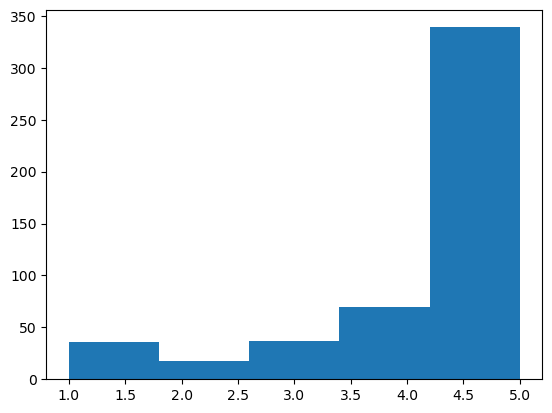

Score
1     36
2     18
3     37
4     70
5    339
Name: Id, dtype: int64


In [12]:
# Create a new data frame “reviews” to perform exploratory data analysis upon that

reviews = df

 

# Dropping null values

reviews.dropna(inplace=True) 

 

# The histogram reveals this dataset is highly unbalanced towards high rating. 

reviews.Score.hist(bins=5,grid=False)

plt.show()

print(reviews.groupby('Score').count().Id)

In [13]:
score_1 = reviews[reviews['Score'] == 1].sample(n=18, random_state=42)
score_2 = reviews[reviews['Score'] == 2].sample(n=18, random_state=42)
score_3 = reviews[reviews['Score'] == 3].sample(n=18, random_state=42)
score_4 = reviews[reviews['Score'] == 4].sample(n=18, random_state=42)
score_5 = reviews[reviews['Score'] == 5].sample(n=18, random_state=42)


In [14]:
# Here we recreate a 'balanced' dataset.

reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)

reviews_sample.reset_index(drop=True,inplace=True)

 

# Printing count by 'Score' to check dataset is now balanced.

print(reviews_sample.groupby('Score').count().Id)

Score
1    18
2    18
3    18
4    18
5    18
Name: Id, dtype: int64


In [15]:
! pip install wordcloud

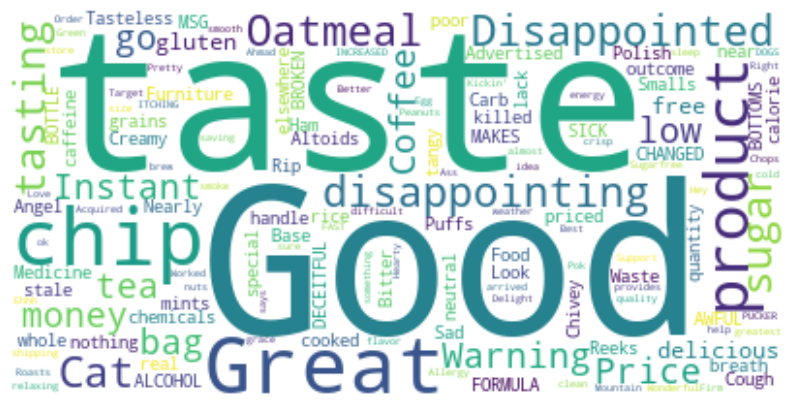

In [16]:
# Let's build a word cloud looking at the 'Summary'  text

from wordcloud import WordCloud

 

reviews_str = " ".join(reviews_sample["Summary"].to_numpy())

 

#reviews_str = reviews_sample.Summary.str.cat()

 

wordcloud = WordCloud(background_color='white').generate(reviews_str)

plt.figure(figsize=(10,10))

plt.imshow(wordcloud,interpolation='bilinear')

plt.axis("off")

plt.show()

In [17]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or #5) Reviews.

negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2]) ]

positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5]) ]

 

# Transform to single string

negative_reviews_str = negative_reviews.Summary.str.cat()

positive_reviews_str = positive_reviews.Summary.str.cat()

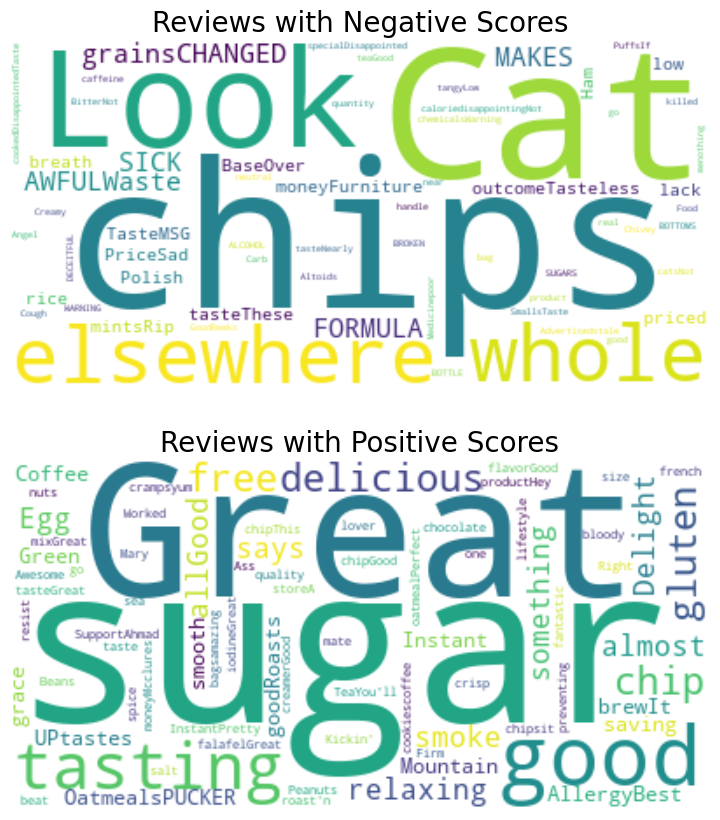

In [18]:
# Create wordclouds
wordcloud_negative = WordCloud(background_color='white') \
    .generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white') \
 .generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

In [19]:
!pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ------ -------------------------------- 20.5/126.0 kB 217.9 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/126.0 kB 435.7 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/126.0 kB 435.7 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/126.0 kB 521.8 kB/s eta 0:00:01
   --------------------------------- ---- 112.6/126.0 kB 467.6 kB/s eta 0:00:01
   --------------------------------- ---- 112.6/126.0 kB 467.6 kB/s eta 0:00:01
   --------------------------------- ---- 112.6/126.0 kB 467.6 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 321.4 kB/s eta 0:00:00


In [20]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')
cp = sns.color_palette()
analyzer = SentimentIntensityAnalyzer()
emptyline=[]
for row in df['Text']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)

In [21]:
# Creating new dataframe with sentiments    

df_sentiments=pd.DataFrame(emptyline)

df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.517,0.483,0.9413
1,0.258,0.644,0.099,-0.5719
2,0.126,0.623,0.250,0.7880
3,0.000,0.868,0.132,0.4404
4,0.000,0.455,0.545,0.9186


In [22]:
# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labelled lumbo halted peanuts....,0.258,0.644,0.099,-0.5719
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","connection around centuries. light, pillow cit...",0.126,0.623,0.250,0.7880


In [23]:
# Convert scores into positive and negetive sentiments using some threshold

df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive', 'Negative')

df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labelled lumbo halted peanuts....,0.258,0.644,0.099,-0.5719,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","connection around centuries. light, pillow cit...",0.126,0.623,0.250,0.7880,Positive


Sentiment
Positive    458
Negative     42
Name: count, dtype: int64


<Axes: xlabel='Sentiment'>

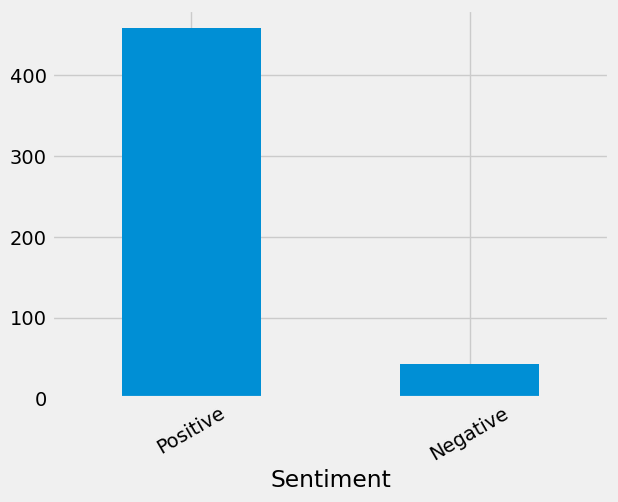

In [24]:
result=df_c['Sentiment'].value_counts()

print(result)

result.plot(kind='bar', rot=30)

Sentiment
Positive    458
Negative     42
Name: count, dtype: int64


<Axes: xlabel='Sentiment'>

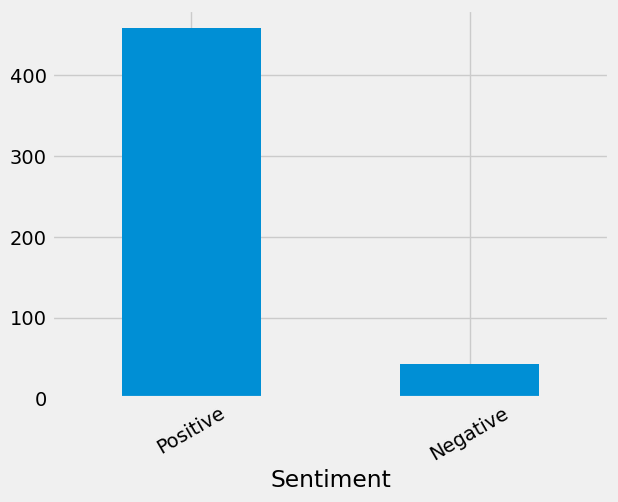

In [45]:
result=df_c['Sentiment'].value_counts()
print(result)
result.plot(kind='bar', rot=30)

In [47]:
#Installing emot library

!pip install emot

   ---------------------------------------- 0.0/61.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/61.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/61.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/61.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/61.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/61.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/61.5 kB ? eta -:--:--
   ------ --------------------------------- 10.2/61.5 kB ? eta -:--:--
   ------ --------------------------------- 10.2/61.5 kB ? eta -:--:--
   ------ --------------------------------- 10.2/61.5 kB ? eta -:--:--
   ------ --------------------------------- 10.2/61.5 kB ? eta -:--:--
   ------ --------------------------------- 10.2/61.5 kB ? eta -:--:--
   ------ --------------------------------- 10.2/61.5 kB ? eta -:--:--
   ------ --------------------------------- 10.2/61.5 kB ? eta -:--:--
   ------ ---

In [61]:
#create sample text data with emoji
text1 = "What are you saying 😅 . I am the boss , and why are you so "

In [63]:
import re
from emot.emo_unicode import UNICODE_EMOJI
from emot.emo_unicode import EMOTICONS_EMO

In [65]:
# Function for converting emojis into word
def converting_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","")\
                                           .replace(":","").split()))
    return text
converting_emojis(text1)

'What are you saying grinning_face_with_sweat . I am the boss , and why are you so '

In [67]:
def emoji_removal(string):
    emoji_unicodes = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols 
                               u"\U0001F680-\U0001F6FF"  # transport 
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_unicodes.sub(r'', string)
emoji_removal(text1)

'What are you saying  . I am the boss , and why are you so '